Goal: Analyze how different pitches affect K percentage

Steps: 
    Found players with the top 10 highest K percentage
    Analyzed pitch type percentage with K percentage for #1 Spencer Strider and #20 Zac Gallen
    Found the mean percentage of each type of pitch thrown
    Ran correlation test between different pitch types with K percentage

Results:
    Very little correlation between the percentage of pitches being thrown on K percentage. There is a weak negative correlation for        sinker percentage with K percentage and a slightly moderate correlation between four seam percentage and K percentage.

In [1]:
# Load the CSV data into a data frame
data <- read.csv("PitchPercentage.csv")

# View the first 10 rows of the data frame
head(data, n = 10)

,Player,Year,KPercentage,TotalPitches,FourSeamPercentage,FourSeamAvgMPH,SliderPercentage,SliderAvgMPH,ChangePercentage,ChangeAvgMPH,⋯,SplitterPercentage,SplitterAvgMPH,KnucklePercentage,KnuckleAvgMPH,FastballPercentage,FastballAvgMPH,BreakingPercentage,BreakingAvgMPH,OffspeedPercentage,OffspeedAvgMPH
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Valdez, Framber",2023,24.8,"2,950.00",0.2,95.1,NA,NA,15.8,90.1,⋯,NA,NA,NA,NA,59.9,93.2,24.3,80.2,15.8,90.1
2,"Cobb, Alex",2023,20.3,"2,506.00",0.3,95.8,5.1,86.2,NA,NA,⋯,38.7,89.5,NA,NA,39.9,94.5,21.3,84.2,38.7,89.5
3,"Dunning, Dane",2023,19.4,"2,696.00",3.2,90.5,23.4,82.1,15.6,85.7,⋯,NA,NA,NA,NA,56.3,90.2,28.1,81.4,15.6,85.7
4,"Webb, Logan",2023,22.8,"3,182.00",3.7,92.6,21.2,84.3,41.6,87.5,⋯,NA,NA,NA,NA,37.2,92.3,21.2,84.3,41.6,87.5
5,"Perez, Martin",2023,15.3,"2,223.00",3.9,91.8,1.0,83.4,26.5,84.1,⋯,NA,NA,NA,NA,68.9,90.9,4.7,80.0,26.5,84.1
6,"Eflin, Zach",2023,26.5,"2,577.00",6.2,92.9,0.3,84.1,5.1,86.4,⋯,NA,NA,NA,NA,64.2,90.8,30.7,79.2,5.1,86.4
7,"Garrett, Braxton",2023,23.7,"2,479.00",7.5,90.8,25.9,82.8,8.8,84.1,⋯,NA,NA,NA,NA,56.9,89.6,34.2,81.6,8.8,84.1
8,"Stroman, Marcus",2023,20.7,"2,203.00",8.2,92.0,5.2,86.1,NA,NA,⋯,7.7,86.6,NA,NA,64.1,91.3,28.1,84.9,7.7,86.6
9,"Bassitt, Chris",2023,22.5,"3,139.00",9.3,92.4,4.7,80.3,6.6,84.1,⋯,3.3,82.6,NA,NA,63.9,91.0,26.2,73.2,9.9,83.6


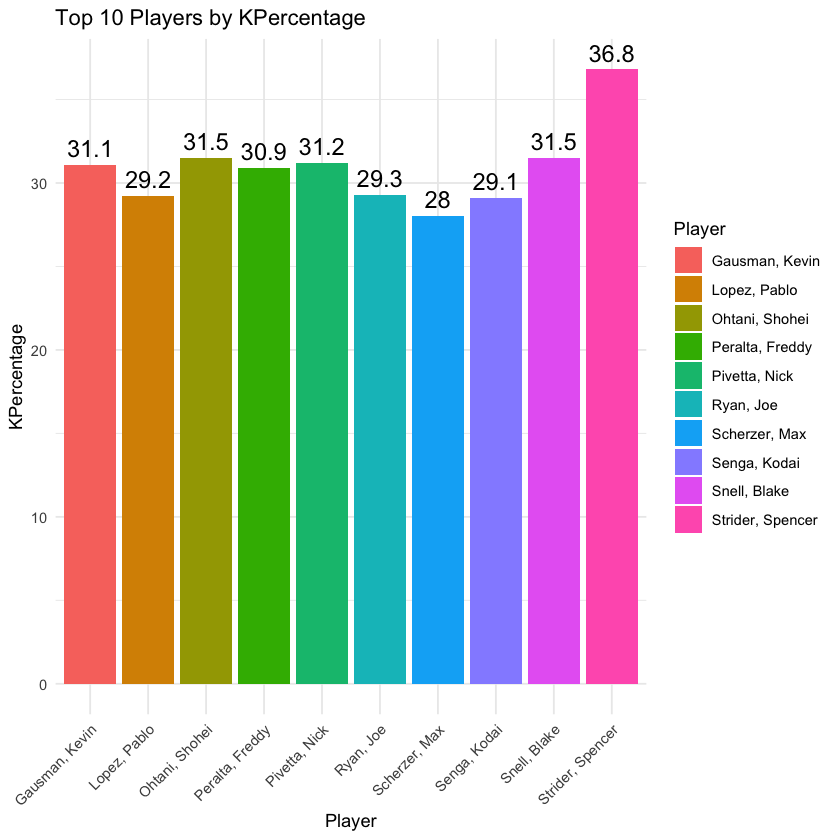

In [3]:
library(ggplot2)

# Sort the data by KPercentage in descending order and select the top 10
top_10_players <- head(data[order(-data$KPercentage), ], 10)

# Create a bar graph for the top 10 players and their KPercentage
ggplot(top_10_players, aes(x = Player, y = KPercentage, fill = Player)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = KPercentage), vjust = -0.5, size = 5) +  # Add labels to the bars
  labs(title = "Top 10 Players by KPercentage") +
  xlab("Player") +
  ylab("KPercentage") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability


In [15]:
# Filter the data for the specific player (Replace with player to analyze)
strider_data <- data[data$Player == "Strider, Spencer", ]

strider_data


,Player,Year,KPercentage,TotalPitches,FourSeamPercentage,FourSeamAvgMPH,SliderPercentage,SliderAvgMPH,ChangePercentage,ChangeAvgMPH,⋯,SplitterPercentage,SplitterAvgMPH,KnucklePercentage,KnuckleAvgMPH,FastballPercentage,FastballAvgMPH,BreakingPercentage,BreakingAvgMPH,OffspeedPercentage,OffspeedAvgMPH
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
92,"Strider, Spencer",2023,36.8,"3,086.00",58.9,97.3,33.8,85.6,7.3,87,⋯,NA,NA,NA,NA,58.9,97.3,33.8,85.6,7.3,87


In [16]:
# Create a data frame for pitch mix
strider_pitch_mix <- data.frame(
  PitchType = c("FourSeam", "Slider", "Change", "Curve", "Sinker", "Cutter", "Splitter", "Knuckle"),
  Percentage = c(
    strider_data$FourSeamPercentage,
    strider_data$SliderPercentage,
    strider_data$ChangePercentage,
    strider_data$CurvePercentage,
    strider_data$SinkerPercentage,
    strider_data$CutterPercentage,
    strider_data$SplitterPercentage,
    strider_data$KnucklePercentage
  )
)

# Print the pitch mix data frame
strider_pitch_mix

PitchType,Percentage
<chr>,<dbl>
FourSeam,58.9
Slider,33.8
Change,7.3
Curve,NA
Sinker,NA
Cutter,NA
Splitter,NA
Knuckle,NA


Warning message:
“Removed 5 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 5 rows containing missing values (`position_stack()`).”


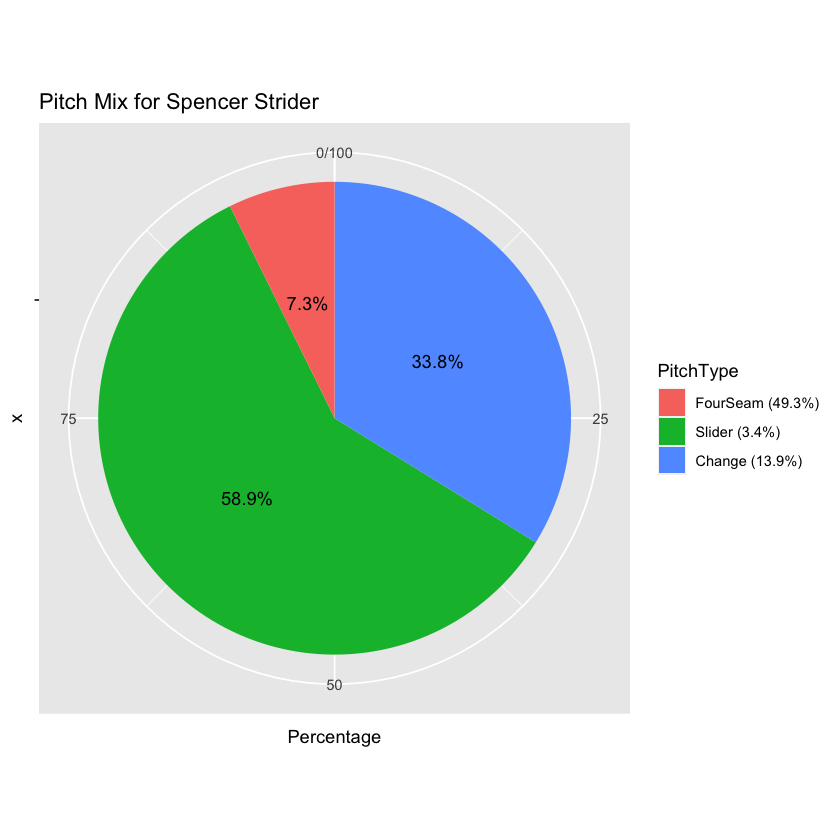

In [18]:
library(ggplot2)

# Create a pie chart of pitch mix
gg <- ggplot(strider_pitch_mix, aes(x = "", y = Percentage, fill = PitchType)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Pitch Mix for Spencer Strider")

# Calculate the percentages and add them as custom labels to the legend
legend_labels <- paste0(strider_pitch_mix$PitchType, " (", gallen_pitch_mix$Percentage, "%)")
gg <- gg + scale_fill_discrete(labels = legend_labels)

# Add labels inside the pie chart
gg <- gg + geom_text(aes(label = paste0(Percentage, "%")), position = position_stack(vjust = 0.5))

# Print the pie chart
print(gg)


In [19]:
# Filter the data for the specific player (Replace with player to analyze)
player_data <- data[data$Player == "Gallen, Zac", ]

player_data

,Player,Year,KPercentage,TotalPitches,FourSeamPercentage,FourSeamAvgMPH,SliderPercentage,SliderAvgMPH,ChangePercentage,ChangeAvgMPH,⋯,SplitterPercentage,SplitterAvgMPH,KnucklePercentage,KnuckleAvgMPH,FastballPercentage,FastballAvgMPH,BreakingPercentage,BreakingAvgMPH,OffspeedPercentage,OffspeedAvgMPH
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
77,"Gallen, Zac",2023,26,"3,248.00",49.3,93.6,3.4,87.5,13.9,86.8,⋯,NA,NA,NA,NA,59.9,92.9,26.1,83.1,13.9,86.8


In [20]:
# Create a data frame for pitch mix
pitch_mix <- data.frame(
  PitchType = c("FourSeam", "Slider", "Change", "Curve", "Sinker", "Cutter", "Splitter", "Knuckle"),
  Percentage = c(
    player_data$FourSeamPercentage,
    player_data$SliderPercentage,
    player_data$ChangePercentage,
    player_data$CurvePercentage,
    player_data$SinkerPercentage,
    player_data$CutterPercentage,
    player_data$SplitterPercentage,
    player_data$KnucklePercentage
  )
)

# Print the pitch mix data frame
pitch_mix


PitchType,Percentage
<chr>,<dbl>
FourSeam,49.3
Slider,3.4
Change,13.9
Curve,22.7
Sinker,0.4
Cutter,10.3
Splitter,NA
Knuckle,NA


Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”


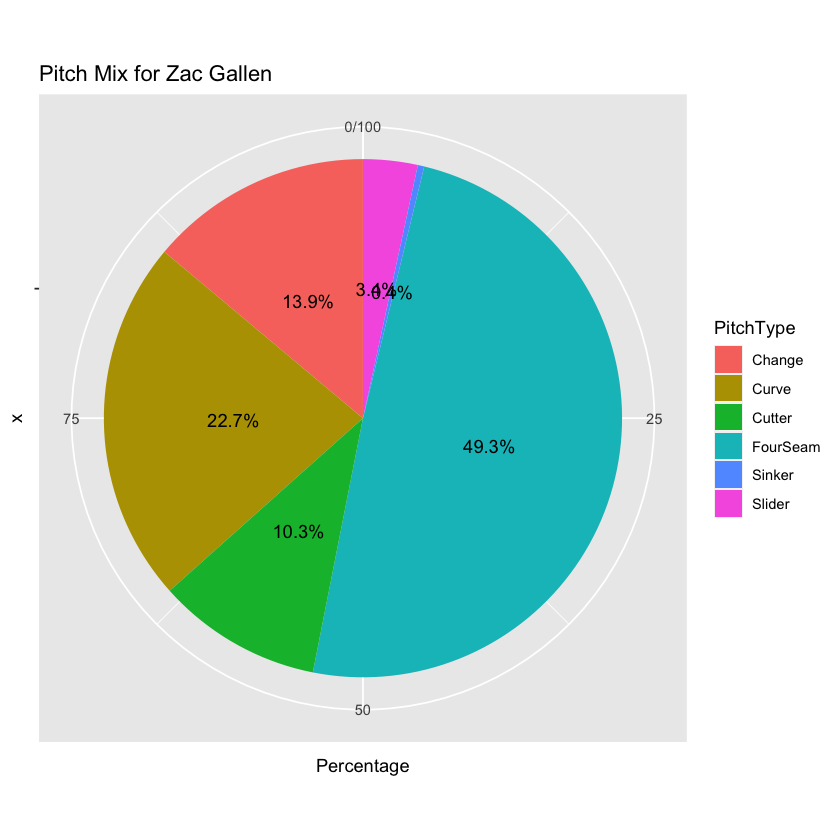

In [22]:
library(ggplot2)

# Create a pie chart of pitch mix
ggplot(pitch_mix, aes(x = "", y = Percentage, fill = PitchType)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = "Pitch Mix for Zac Gallen") +
  geom_text(aes(label = paste0(Percentage, "%")), position = position_stack(vjust = 0.5)) 


In [10]:
# Load the CSV data into a data frame
data <- read.csv("PitchPercentage.csv")

# Specify the columns you want to calculate the means for
columns_to_mean <- c(
  "KPercentage", "TotalPitches", "FourSeamPercentage", "FourSeamAvgMPH",
  "SliderPercentage", "SliderAvgMPH", "ChangePercentage", "ChangeAvgMPH",
  "CurvePercentage", "CurveAvgMPH", "SinkerPercentage", "SinkerAvgMPH",
  "CutterPercentage", "CutterAvgMPH", "SplitterPercentage", "SplitterAvgMPH",
  "KnucklePercentage", "KnuckleAvgMPH", "FastballPercentage", "FastballAvgMPH",
  "BreakingPercentage", "BreakingAvgMPH", "OffspeedPercentage", "OffspeedAvgMPH"
)

# Convert the specified columns to numeric
data[, columns_to_mean] <- lapply(data[, columns_to_mean], as.numeric)

# Calculate the mean values for the specified columns
means_df <- data.frame(
  Variable = columns_to_mean,
  MeanValue = colMeans(data[, columns_to_mean], na.rm = TRUE)
)

# Print or use the means_df dataframe
means_df


Warning message in lapply(data[, columns_to_mean], as.numeric):
“NAs introduced by coercion”


,Variable,MeanValue
,<chr>,<dbl>
KPercentage,KPercentage,22.85500
TotalPitches,TotalPitches,NaN
FourSeamPercentage,FourSeamPercentage,34.97368
FourSeamAvgMPH,FourSeamAvgMPH,93.61474
SliderPercentage,SliderPercentage,18.41481
SliderAvgMPH,SliderAvgMPH,84.80617
ChangePercentage,ChangePercentage,13.40714
ChangeAvgMPH,ChangeAvgMPH,85.69405
CurvePercentage,CurvePercentage,13.74286


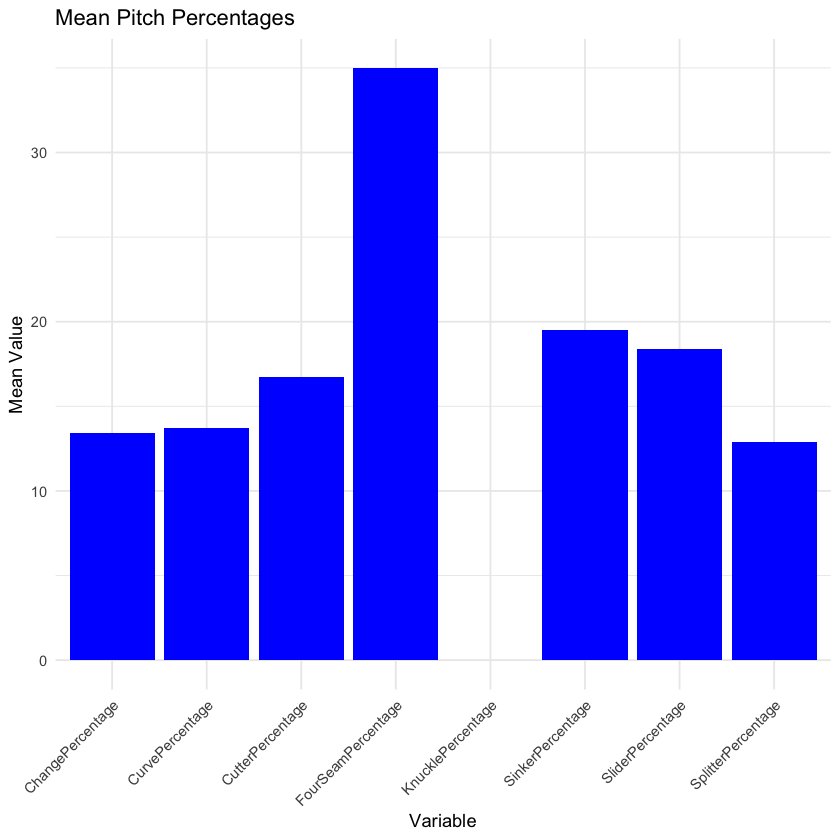

In [11]:
# Filter means_df to include only the specified fields
selected_fields <- c(
  "FourSeamPercentage", "SliderPercentage", "ChangePercentage",
  "CurvePercentage", "SinkerPercentage", "CutterPercentage",
  "SplitterPercentage", "KnucklePercentage"
)

filtered_means_df <- means_df[means_df$Variable %in% selected_fields, ]

# Create a bar graph for the selected percentage fields
ggplot(filtered_means_df, aes(x = Variable, y = MeanValue)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Mean Pitch Percentages") +
  xlab("Variable") +
  ylab("Mean Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability


In [12]:
# Load the CSV data into a data frame
data <- read.csv("PitchPercentage.csv")

# Prepare the data
percentage_columns <- c(
  "FourSeamPercentage", "SliderPercentage", "ChangePercentage", "CurvePercentage",
  "SinkerPercentage", "CutterPercentage", "SplitterPercentage", "KnucklePercentage"
)

# Convert percentage columns to numeric and remove commas
data[, percentage_columns] <- lapply(data[, percentage_columns], function(x) as.numeric(gsub(",", "", x)))

# Filter out rows with missing values in KPercentage
data <- data[complete.cases(data$KPercentage), ]

head(data, n = 10)

,Player,Year,KPercentage,TotalPitches,FourSeamPercentage,FourSeamAvgMPH,SliderPercentage,SliderAvgMPH,ChangePercentage,ChangeAvgMPH,⋯,SplitterPercentage,SplitterAvgMPH,KnucklePercentage,KnuckleAvgMPH,FastballPercentage,FastballAvgMPH,BreakingPercentage,BreakingAvgMPH,OffspeedPercentage,OffspeedAvgMPH
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Valdez, Framber",2023,24.8,"2,950.00",0.2,95.1,NA,NA,15.8,90.1,⋯,NA,NA,NA,NA,59.9,93.2,24.3,80.2,15.8,90.1
2,"Cobb, Alex",2023,20.3,"2,506.00",0.3,95.8,5.1,86.2,NA,NA,⋯,38.7,89.5,NA,NA,39.9,94.5,21.3,84.2,38.7,89.5
3,"Dunning, Dane",2023,19.4,"2,696.00",3.2,90.5,23.4,82.1,15.6,85.7,⋯,NA,NA,NA,NA,56.3,90.2,28.1,81.4,15.6,85.7
4,"Webb, Logan",2023,22.8,"3,182.00",3.7,92.6,21.2,84.3,41.6,87.5,⋯,NA,NA,NA,NA,37.2,92.3,21.2,84.3,41.6,87.5
5,"Perez, Martin",2023,15.3,"2,223.00",3.9,91.8,1.0,83.4,26.5,84.1,⋯,NA,NA,NA,NA,68.9,90.9,4.7,80.0,26.5,84.1
6,"Eflin, Zach",2023,26.5,"2,577.00",6.2,92.9,0.3,84.1,5.1,86.4,⋯,NA,NA,NA,NA,64.2,90.8,30.7,79.2,5.1,86.4
7,"Garrett, Braxton",2023,23.7,"2,479.00",7.5,90.8,25.9,82.8,8.8,84.1,⋯,NA,NA,NA,NA,56.9,89.6,34.2,81.6,8.8,84.1
8,"Stroman, Marcus",2023,20.7,"2,203.00",8.2,92.0,5.2,86.1,NA,NA,⋯,7.7,86.6,NA,NA,64.1,91.3,28.1,84.9,7.7,86.6
9,"Bassitt, Chris",2023,22.5,"3,139.00",9.3,92.4,4.7,80.3,6.6,84.1,⋯,3.3,82.6,NA,NA,63.9,91.0,26.2,73.2,9.9,83.6


In [13]:
# Perform a correlation analysis
correlation_df <- data.frame(PitchType = character(0), Correlation = numeric(0))

for (col in percentage_columns) {
  correlation <- cor(data$KPercentage, data[, col], use = "complete.obs")
  correlation_df <- rbind(correlation_df, data.frame(PitchType = col, Correlation = correlation))
}

correlation_df

PitchType,Correlation
<chr>,<dbl>
FourSeamPercentage,0.35594367
SliderPercentage,-0.03290479
ChangePercentage,-0.14977817
CurvePercentage,0.15621446
SinkerPercentage,-0.29726708
CutterPercentage,-0.01353596
SplitterPercentage,-0.01824308
KnucklePercentage,NA


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


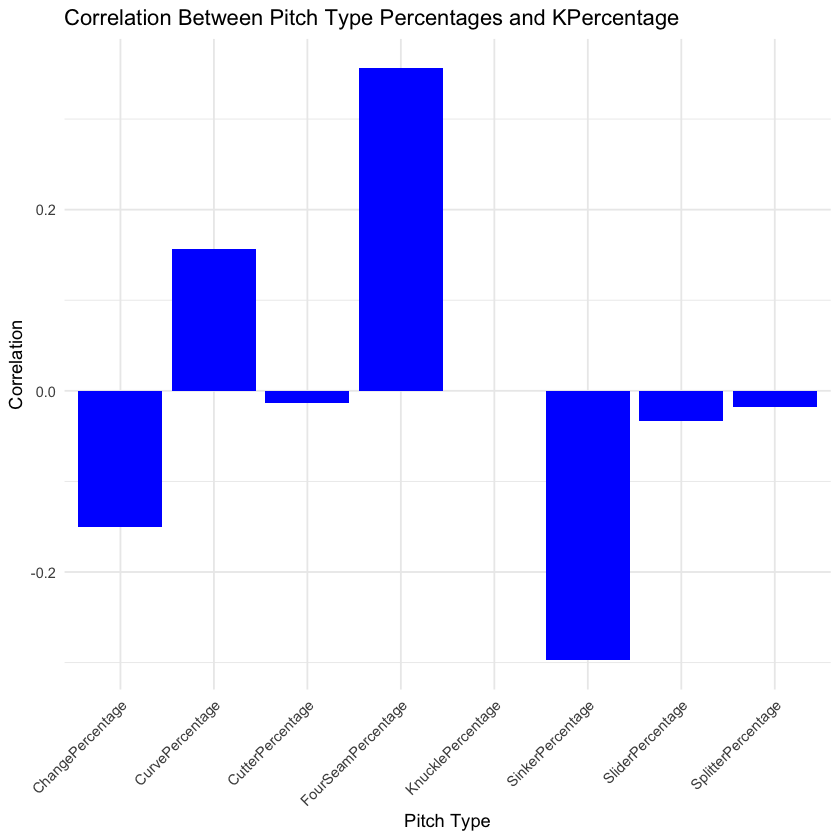

In [14]:
library(ggplot2)

# Create a bar plot to visualize correlations
ggplot(correlation_df, aes(x = PitchType, y = Correlation)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Correlation Between Pitch Type Percentages and KPercentage") +
  xlab("Pitch Type") +
  ylab("Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability
